In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from ast import literal_eval
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
sns.set(style='darkgrid', context='notebook', rc={'figure.figsize':(14,10)})

plt.style.use('ggplot')
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [2]:
# Load the gene groups code created by remaking_gene_groups.py
gene_groups = pd.read_csv('gene_groups_post-fix_by_phylum.csv')
N = [i.split(' ')[3][2:] for i in gene_groups.columns.to_list()[2:]]
# Remove the N = X from each column name
new_cols = [i.split(' ')[0] for i in gene_groups.columns.to_list()]
gene_groups.columns = new_cols

combined_dict = dict(zip(new_cols[2:],N))
gene_groups.loc[:,'Length'] = [len(literal_eval(i)) for i in gene_groups.Gene_Group]
gene_groups.head()


,Gene_Group,Prevalence,Chordata,Arthropoda,Cnidaria,Echinodermata,Mollusca,Porifera,Platyhelminthes,Nemertea,...,Chaetognatha,Priapulida,Tardigrada,Brachiopoda,Bryozoa,Gastrotricha,Entoprocta,Placozoa,Phoronida,Length
0,"['nad1', 'trnI', '-trnQ', 'trnM', 'nad2', 'trn...",43.71,68.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37
1,"['trnI', '-trnQ', 'trnM', 'nad2', 'trnW', '-tr...",43.71,68.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36
2,"['-trnQ', 'trnM', 'nad2', 'trnW', '-trnA', '-t...",43.73,68.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35
3,"['trnM', 'nad2', 'trnW', '-trnA', '-trnN', '-t...",44.70,69.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34
4,"['nad2', 'trnW', '-trnA', '-trnN', '-trnC', '-...",44.86,69.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33


In [3]:
# Choose the most represented phyla
top_phyly = sorted(new_cols[2:], key = lambda x :int(combined_dict[x]), reverse = True)
melted_gene_groups = pd.melt(gene_groups, id_vars=['Gene_Group','Length'] ,value_vars = top_phyly[:7], 
                             var_name='Phylum', value_name = 'Phyl_prev')

top_phyl = ['Chordata','Arthropoda','Echinodermata', 'Mollusca', 'Cnidaria', 'Nematoda']
palette = ['Red','Orange','Green','Purple', 'Blue', 'Brown']
max_for_each_len = melted_gene_groups.groupby(['Phylum','Length']).max().reset_index()
max_for_each_len = max_for_each_len[max_for_each_len['Phylum'].isin(top_phyl)]
max_for_each_len.Phylum.unique()

array(['Arthropoda', 'Chordata', 'Cnidaria', 'Echinodermata', 'Mollusca',
       'Nematoda'], dtype=object)

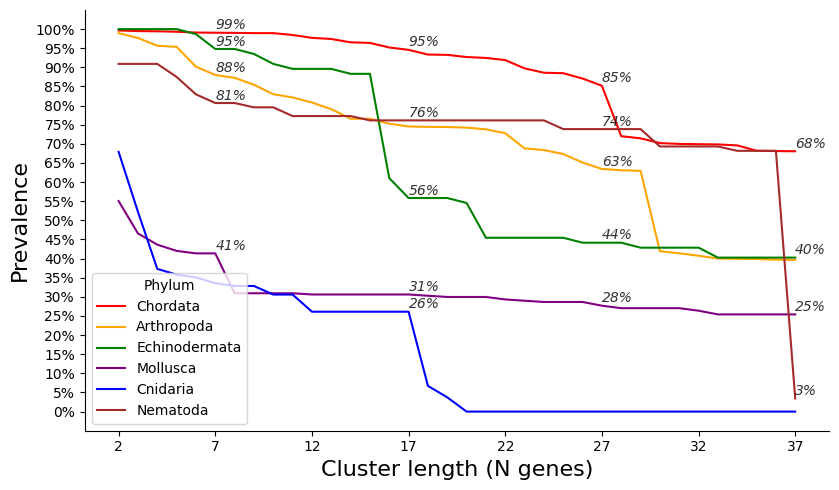

In [5]:
# Figure 3B - Prevalence of the most common cluster for each gene cluster length, split by phylum.
plt.style.use('default')

to_show = [7,17,27,37]
fig, ax = plt.subplots(figsize=(8.5,5))
offset = 0.9
denied = [39.66, 0.0, 74.54, 33.58]
y_dict = {k:[] for k in to_show}
for phyl in top_phyl:
    for i,v in max_for_each_len.loc[max_for_each_len.Phylum == phyl,:].iterrows():
        if v.Length in to_show:
            if v.Phyl_prev in denied: continue
            ax.text(x = v.Length, y = v.Phyl_prev + offset, s = f'{int(round(v.Phyl_prev, 0))}%', size = 10, fontstyle = 'oblique', alpha = .8)



            y_dict[v.Length].append(v.Phyl_prev+offset)
sns.lineplot(x = 'Length', y = 'Phyl_prev', data = max_for_each_len.loc[max_for_each_len.Length < 38,:],
             palette = palette, hue = 'Phylum', hue_order = top_phyl, ax = ax)
ax.set_yticks(ticks = range(0,101,5))
ax.set_xticks(ticks = range(2,38,5))
ax.set_yticklabels(labels = [f'{i}%' for i in range(0,101,5)])
# Despine the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.xlabel('Cluster length (N genes)', fontsize = 16)
plt.ylabel('Prevalence', fontsize = 16)
plt.tight_layout()
plt.savefig(os.path.join('figures', 'fig_3b_prev_per_clust_len.svg'), dpi = 300)
#plt.title('Prevalence of the most common gene cluster by length')

ymin, ymax = ax.get_ylim()
color="#3498db" # choose a color
bonus = (ymax - ymin) / 50 # still hard coded bonus but scales with the data
for phyl in top_phyly[:7]:
    for x, y, name in zip(ax.get_xticks()[1:], max_for_each_len.loc[(max_for_each_len.Length % 5 == 0) & (max_for_each_len.Phylum == phyl),"Phyl_prev"],
                          max_for_each_len.loc[max_for_each_len.Phylum == phyl,"Phyl_prev"]):
        ax.text(x, y + bonus, f'{int(round(name,0))}%', color=color)